# TFM Plagas
## Grupo 2
### 24 de Febrero 2019

# Práctica de Python: "Predicción de plagas en cultivos de Andalucía"

## Descripción del proyecto

El proyecto consiste en desarrollar un modelo descriptivo y predictivo que permita predecir plagas en cultivos, basándonos en la relación que tienen, con el clima meteorológico y el tipo de cultivo en una zona específica de España.
Se ha detectado la necesidad de identificar con anticipación la aparición y control de plagas por el inmenso daño que provocan en los cultivos. Datos físicos a frutos, pérdida de follaje, lesiones o decoloración en el fruto o las hojas, deformación en los frutos, hojas y flores, y en ocasiones la pérdida total de la produccion, son algunos ejemplos de las posibles consecuencias de una mala gestión de plagas.
Producto de lo anterior y en relación a la práctica, obtenemos datos desde la junta de Andalucía los cuales acotamos a cultivo de hortalizas y mediciones del clima desde el 2016 en adelante.

## Instrucciones

Descargar carpeta Dat con sus archivos de hortalizas 2011-2017, hortalizas 2017-2018, clima (2016 a 2018) y estaciones.

## Trabajamos primero con la tabla de 'Clima'
Para esto tenemos que unir tres tablas, estas se encuentran en formato XML por lo cual hay que importarlas y convertirlas a Data Frame antes de unirlas.

Para esto se necesitan dos librerias, pandas y element tree.

Despues utilizamos una serie de comandos con condicional para que siguiendo la estructura anidada de un XML podamos extraer los datos y convertir el formato a un Data Frame.

In [1]:
# Cargamos herramienta de lectura en XML

import xml.etree.ElementTree as ET
import pandas as pd

In [2]:
# Para convertir XML en DataFrame

def xml2df(xml_data):
   root = ET.XML(xml_data) 
   all_records = []
   for i, child in enumerate(root):
       record = {}
       for subchild in child:
           record[subchild.tag] = subchild.text
       all_records.append(record)
   df = pd.DataFrame(all_records)

   return df

In [3]:
# Cargamos la tabla de 2016 y revisamos los ultimos datos (tail) para revisar que se hayan importado bien los datos
t16 = open('dat/Clim_Diario_2016.xml').read() # abrimos el archivo XML y le asignamos el nombre de t16
df = xml2df(t16) # a la varaible creada le ejecutamos el convertidor a XML
temp16 = df # le asignamos un nombre al nuevo Data Frame
temp16.tail() # hacemos una consulta de los ultimos 5 datos

CV1   CV2  CV3  CV4 Direccion                FECHA H_R_Max  \
26442   93  1058   96  192         4  2016-12-27T00:00:00    84.1   
26443   56  1364    6   13         2  2016-12-28T00:00:00    84.3   
26444  103  1302   25    8         2  2016-12-29T00:00:00      83   
26445  235   967  213   25         3  2016-12-30T00:00:00    93.3   
26446    0  1329  111    0         3  2016-12-31T00:00:00   79.93   

                H_R_Med H_R_Min Lluvia   Radiacion  T_Max             T_Med  \
26442  67.9220833333333    49.8      0  0.30702405   16.4  10.2685833333333   
26443  70.0529166666667   48.94      0  0.32374785  16.93  12.1033333333333   
26444  72.0816666666667   55.34      0   0.3241209  15.89  12.1833333333333   
26445  75.1479166666666   55.73    0.1  0.30629865  14.92  10.1865416666667   
26446           67.0325   55.17      0   0.2985099  13.81         10.218125   

       T_Min  V_Max             V_Med V_Min cod_est  
26442  2.748  23.36  7.84716666666667     0   SE013  
26443  7.429   34.5  11.4009166666667     0   SE013  
26444   9.01  28.44  10.1039166666667     0   SE013  
26445  4.321  34.54             8.731     0   SE013  
26446  6.763  33.34         12.424375     0   SE013

In [4]:
# Cargamos la tabla de 2017 y revisamos los primero datos (head) para revisar que se hayan importado bien los datos
t17 = open('dat/Clim_Diario_2017.xml').read()
df = xml2df(t17)
temp17 = df
temp17.head()

CV1  CV2  CV3 CV4 Direccion                FECHA H_R_Max           H_R_Med  \
0  149   29  282   9         3  2017-01-01T00:00:00    80.9  64.1422222222222   
1  199  268   44   0         2  2017-01-02T00:00:00    86.7  67.3155555555556   
2   75    2  470  13         3  2017-01-03T00:00:00    95.3  81.1481818181818   
3  171   16  404   3         3  2017-01-04T00:00:00    93.1  68.6609090909091   
4   85  240  221   2         3  2017-01-05T00:00:00    90.6  63.7718181818182   

  H_R_Min Lluvia          Radiacion  T_Max             T_Med  T_Min  V_Max  \
0   55.21      0            0.55868  15.33  12.9966666666667   8.59  13.95   
1   55.85      0          0.8617604  17.38  13.5348888888889  6.539   10.8   
2   73.35      0  0.824358109090909  15.98  12.6504545454545   3.81   19.8   
3    56.3      0  0.843926727272727  19.05            15.168  6.437  15.75   
4   47.87      0          0.9157356   21.1  16.2764545454545   5.93   11.7   

              V_Med V_Min cod_est  
0  3.30411111111111     0   AL001  
1  2.06888888888889     0   AL001  
2  5.53009090909091     0   AL001  
3  3.43481818181818     0   AL001  
4  1.54290909090909     0   AL001

In [5]:
# Cargamos la tabla de 2018 y revisamos los ultimos datos (tail) para revisar que se hayan importado bien los datos
t18 = open('dat/Clim_Diario_2018.xml').read()
df = xml2df(t18)
temp18 = df
temp18.tail()

FECHA H_R_Max           H_R_Med H_R_Min  \
22570  2018-10-26T00:00:00    93.2  85.9679166666667   65.88   
22571  2018-10-27T00:00:00      94              78.5   54.61   
22572  2018-10-28T00:00:00    85.7  73.1754166666667   57.76   
22573  2018-10-29T00:00:00    85.7  63.1283333333333   37.49   
22574  2018-10-30T00:00:00   78.65            76.832   72.78   

      PromedioDeDireccion PromedioDeRadiacion SumaDeCV1 SumaDeCV2 SumaDeCV3  \
22570    2.58333333333333          0.17282115       293       486       148   
22571    3.33333333333333          0.42313305       137       101       439   
22572    3.66666666666667          0.35450685        86       170       203   
22573                   3          0.68448075        99       447       374   
22574                   2                   0        26       271         3   

      SumaDeCV4 SumaDeLluvia  T_Max             T_Med  T_Min  V_Max  \
22570       504          1.3   19.1  14.7720833333333  12.17  16.19   
22571       763          2.8  19.42  15.0004166666667  11.14  25.82   
22572       977          1.1  11.24  7.84933333333333  4.322  26.99   
22573       522          0.1  13.01  7.97666666666667  2.045  28.51   
22574         0          0.1   8.57            7.3292  5.827  11.15   

                  V_Med V_Min cod_est  
22570  2.52395833333333     0   SE013  
22571  6.63858333333333     0   SE013  
22572  6.13816666666667     0   SE013  
22573  6.71545833333333     0   SE013  
22574             4.231     0   SE013

### Inspección de las tablas
Podemos observar que las tablas del 2016 y 2017 tienen las columnas con los mismo nombres y orden, mientras que en la del 2018 cambian.
Por lo cual tenemos que hacer una normalización.

In [6]:
# Revisamos los nombres y orden de las columnas en 2016 o 2017
list(temp17)

['CV1',
 'CV2',
 'CV3',
 'CV4',
 'Direccion',
 'FECHA',
 'H_R_Max',
 'H_R_Med',
 'H_R_Min',
 'Lluvia',
 'Radiacion',
 'T_Max',
 'T_Med',
 'T_Min',
 'V_Max',
 'V_Med',
 'V_Min',
 'cod_est']

In [7]:
# Revisamos los nombres y orden de las columnas en 2018
list (temp18)

['FECHA',
 'H_R_Max',
 'H_R_Med',
 'H_R_Min',
 'PromedioDeDireccion',
 'PromedioDeRadiacion',
 'SumaDeCV1',
 'SumaDeCV2',
 'SumaDeCV3',
 'SumaDeCV4',
 'SumaDeLluvia',
 'T_Max',
 'T_Med',
 'T_Min',
 'V_Max',
 'V_Med',
 'V_Min',
 'cod_est']

In [8]:
# Renombramos las columnas del año 2018 para que tengan la misma estructura que las de 2016 y 2017
temp18 = temp18.rename(columns={'PromedioDeDireccion': 'Direccion','SumaDeCV1':  'CV1', 'SumaDeCV2':'CV2', 'SumaDeCV3':'CV3',
                       'SumaDeCV4': 'CV4','SumaDeLluvia':'Lluvia', 'PromedioDeRadiacion' : 'Radiacion'})
list (temp18)

['FECHA',
 'H_R_Max',
 'H_R_Med',
 'H_R_Min',
 'Direccion',
 'Radiacion',
 'CV1',
 'CV2',
 'CV3',
 'CV4',
 'Lluvia',
 'T_Max',
 'T_Med',
 'T_Min',
 'V_Max',
 'V_Med',
 'V_Min',
 'cod_est']

In [9]:
# Ordenamos las columnas en la tabla de 2018
temp18= temp18[['CV1',
 'CV2',
 'CV3',
 'CV4',
 'Direccion',
 'FECHA',
 'H_R_Max',
 'H_R_Med',
 'H_R_Min',
 'Lluvia',
 'Radiacion',
 'T_Max',
 'T_Med',
 'T_Min',
 'V_Max',
 'V_Med',
 'V_Min',
 'cod_est']]
list (temp18)

['CV1',
 'CV2',
 'CV3',
 'CV4',
 'Direccion',
 'FECHA',
 'H_R_Max',
 'H_R_Med',
 'H_R_Min',
 'Lluvia',
 'Radiacion',
 'T_Max',
 'T_Med',
 'T_Min',
 'V_Max',
 'V_Med',
 'V_Min',
 'cod_est']

### Procedemos a unir las 3 tablas de Clima
Existen dos comandos para hacer esto "concat" o "append", la diferencia entre estas es que "concat" mantiene el numero de identificación que se le asignó cuando se importó el archivo, mientras que "append" reinicia ese indice o numero de identificación. Como en esta ocasion no necesitamos se quede ese indice utilizamos "append", aunque incluimos el comando para reiniciar el indice si se usa "concat".

Info sobre diferencias entre "concat" y "append"
https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html

In [10]:
# Unimos las tablas de 2016 y 2017
## temp16_17 = pd.concat([temp16, temp17])
temp16_17 = temp16.append(temp17)
temp16_17

CV1   CV2   CV3   CV4 Direccion                FECHA H_R_Max  \
0       347   339   726    17         3  2016-01-01T00:00:00     100   
1       425    55   771   176         4  2016-01-02T00:00:00    97.2   
2       173   376   859    19         3  2016-01-03T00:00:00    95.5   
3        40     1  1273   106         3  2016-01-04T00:00:00    92.8   
4        59    63  1071   225         4  2016-01-05T00:00:00    96.4   
5       218   101   741   358         4  2016-01-06T00:00:00   65.89   
6       329   216   829    55         3  2016-01-07T00:00:00    97.3   
7       293   159   896    80         3  2016-01-08T00:00:00    97.7   
8        40    34  1293    53         3  2016-01-09T00:00:00    93.1   
9        20    35  1221   140         4  2016-01-10T00:00:00    81.2   
10        0     5  1301   116         3  2016-01-11T00:00:00    94.1   
11      809   540    87     0         3  2016-01-12T00:00:00    97.5   
12     1056   383     0     0         2  2016-01-13T00:00:00    87.6   
13      419   208   794    10         3  2016-01-14T00:00:00    94.3   
14      657   753    27     0         2  2016-01-15T00:00:00    94.3   
15      951   260   168    50         3  2016-01-16T00:00:00    91.1   
16      734   172   522     8         3  2016-01-17T00:00:00    83.2   
17      409   168   831    25         3  2016-01-18T00:00:00    87.3   
18      392   394   574    74         4  2016-01-19T00:00:00    80.3   
19      541   201   641    48         4  2016-01-20T00:00:00    96.9   
20      638   202   592     1         3  2016-01-21T00:00:00    96.8   
21      794   217   421     1         3  2016-01-22T00:00:00      93   
22      936   504     0     0         2  2016-01-23T00:00:00    99.1   
23      809   632     0     0         2  2016-01-24T00:00:00    91.8   
24      729   244   451    11         3  2016-01-25T00:00:00    91.8   
25      304   591   529    12         3  2016-01-26T00:00:00    93.3   
26      655   691    92     0         3  2016-01-27T00:00:00    95.3   
27      649    49   733     2         3  2016-01-28T00:00:00    94.3   
28      816   498   125     0         3  2016-01-29T00:00:00    89.4   
29      741   155   514    19         3  2016-01-30T00:00:00    93.8   
...     ...   ...   ...   ...       ...                  ...     ...   
28124   289   683   103   354         4  2017-12-02T00:00:00    98.9   
28125   527   801    24    86         4  2017-12-03T00:00:00     100   
28126   220   991    66   161         4  2017-12-04T00:00:00      99   
28127   133  1184    80    40         2  2017-12-05T00:00:00    97.1   
28128   205  1095    89    47         2  2017-12-06T00:00:00    98.8   
28129   129  1084    57   167         4  2017-12-07T00:00:00    98.3   
28130   147   838   125   325         4  2017-12-08T00:00:00    99.9   
28131   104   661   140   533         4  2017-12-09T00:00:00    94.4   
28132    71   190   489   689         4  2017-12-10T00:00:00    97.9   
28133     2     9   716   713         4  2017-12-11T00:00:00    99.1   
28134   315   446    18   638         4  2017-12-12T00:00:00    97.9   
28135    93   907   137   298         4  2017-12-13T00:00:00    99.4   
28136    84   639   172   538         4  2017-12-14T00:00:00    99.9   
28137    17     4   552   864         4  2017-12-15T00:00:00    98.9   
28138   815   188    35   393         4  2017-12-16T00:00:00    96.6   
28139   476   586   131   240         4  2017-12-17T00:00:00    99.9   
28140   279   675   175   306         4  2017-12-18T00:00:00    99.1   
28141   173   895   134   237         4  2017-12-19T00:00:00      99   
28142   122   660   239   414         4  2017-12-20T00:00:00     100   
28143    44  1260    42    91         4  2017-12-21T00:00:00    99.8   
28144   158   922   122   233         4  2017-12-22T00:00:00     100   
28145    47  1199    99    94         4  2017-12-23T00:00:00    99.9   
28146    48  1351    30    13         2  2017-12-24T00:00:00    89.4   
28147    21   898   285   234         4  2017-12

In [11]:
# Unimos las tablas de 2016/2017 con 2018
## temp16_18 = pd.concat([temp16, temp17, temp18])
temp16_18 = temp16_17.append(temp18)
temp16_18

CV1   CV2   CV3  CV4         Direccion                FECHA H_R_Max  \
0       347   339   726   17                 3  2016-01-01T00:00:00     100   
1       425    55   771  176                 4  2016-01-02T00:00:00    97.2   
2       173   376   859   19                 3  2016-01-03T00:00:00    95.5   
3        40     1  1273  106                 3  2016-01-04T00:00:00    92.8   
4        59    63  1071  225                 4  2016-01-05T00:00:00    96.4   
5       218   101   741  358                 4  2016-01-06T00:00:00   65.89   
6       329   216   829   55                 3  2016-01-07T00:00:00    97.3   
7       293   159   896   80                 3  2016-01-08T00:00:00    97.7   
8        40    34  1293   53                 3  2016-01-09T00:00:00    93.1   
9        20    35  1221  140                 4  2016-01-10T00:00:00    81.2   
10        0     5  1301  116                 3  2016-01-11T00:00:00    94.1   
11      809   540    87    0                 3  2016-01-12T00:00:00    97.5   
12     1056   383     0    0                 2  2016-01-13T00:00:00    87.6   
13      419   208   794   10                 3  2016-01-14T00:00:00    94.3   
14      657   753    27    0                 2  2016-01-15T00:00:00    94.3   
15      951   260   168   50                 3  2016-01-16T00:00:00    91.1   
16      734   172   522    8                 3  2016-01-17T00:00:00    83.2   
17      409   168   831   25                 3  2016-01-18T00:00:00    87.3   
18      392   394   574   74                 4  2016-01-19T00:00:00    80.3   
19      541   201   641   48                 4  2016-01-20T00:00:00    96.9   
20      638   202   592    1                 3  2016-01-21T00:00:00    96.8   
21      794   217   421    1                 3  2016-01-22T00:00:00      93   
22      936   504     0    0                 2  2016-01-23T00:00:00    99.1   
23      809   632     0    0                 2  2016-01-24T00:00:00    91.8   
24      729   244   451   11                 3  2016-01-25T00:00:00    91.8   
25      304   591   529   12                 3  2016-01-26T00:00:00    93.3   
26      655   691    92    0                 3  2016-01-27T00:00:00    95.3   
27      649    49   733    2                 3  2016-01-28T00:00:00    94.3   
28      816   498   125    0                 3  2016-01-29T00:00:00    89.4   
29      741   155   514   19                 3  2016-01-30T00:00:00    93.8   
...     ...   ...   ...  ...               ...                  ...     ...   
22545   218   658    82  477              2.75  2018-10-01T00:00:00   73.24   
22546   168   870   181  217  2.41666666666667  2018-10-02T00:00:00    82.4   
22547    26  1329    84    0                 2  2018-10-03T00:00:00      85   
22548     4  1395    37    1                 2  2018-10-04T00:00:00   53.62   
22549    48  1273   112    7  2.04166666666667  2018-10-05T00:00:00   48.91   
22550   119  1031    87  200              2.25  2018-10-06T00:00:00   69.55   
22551   173   458   254  545  2.95833333333333  2018-10-07T00:00:00   74.72   
22552   211   588   174  465                 3  2018-10-08T00:00:00   71.99   
22553   122  1062   149  103  2.08333333333333  2018-10-09T00:00:00    85.3   
22554    90   865   323  160  2.33333333333333  2018-10-10T00:00:00      85   
22555    36   752   449  202  2.54166666666667  2018-10-11T00:00:00    83.4   
22556   210   820   169  240  2.33333333333333  2018-10-12T00:00:00    89.9   
22557    42  1269    93   36                 2  2018-10-13T00:00:00   74.64   
22558     2   292   218  926  3.45833333333333  2018-10-14T00:00:00    91.3   
22559    75   615   343  401              2.75  2018-10-15T00:00:00    91.3   
22560   210   320    59  838               3.5  2018-10-16T00:00:00    93.9   
22561   142   711   250  331  2.45833333333333  2018-10-17T00:00:00    93.4   
22562   371   738    77  252  2.08333333333333  2018-10-18T00:00:00    92.5   
22563   223  1007    95  107             2.125  2018-10-19

In [12]:
# Enumeramos las filas desde 0 hasta el último si usaramos concat aunque en esta ocasion lo ejecutamos, por que append
# no esta reiniciando el indice
temp16_18.index=range(temp16_18.shape[0])
temp16_18

CV1   CV2   CV3  CV4         Direccion                FECHA H_R_Max  \
0       347   339   726   17                 3  2016-01-01T00:00:00     100   
1       425    55   771  176                 4  2016-01-02T00:00:00    97.2   
2       173   376   859   19                 3  2016-01-03T00:00:00    95.5   
3        40     1  1273  106                 3  2016-01-04T00:00:00    92.8   
4        59    63  1071  225                 4  2016-01-05T00:00:00    96.4   
5       218   101   741  358                 4  2016-01-06T00:00:00   65.89   
6       329   216   829   55                 3  2016-01-07T00:00:00    97.3   
7       293   159   896   80                 3  2016-01-08T00:00:00    97.7   
8        40    34  1293   53                 3  2016-01-09T00:00:00    93.1   
9        20    35  1221  140                 4  2016-01-10T00:00:00    81.2   
10        0     5  1301  116                 3  2016-01-11T00:00:00    94.1   
11      809   540    87    0                 3  2016-01-12T00:00:00    97.5   
12     1056   383     0    0                 2  2016-01-13T00:00:00    87.6   
13      419   208   794   10                 3  2016-01-14T00:00:00    94.3   
14      657   753    27    0                 2  2016-01-15T00:00:00    94.3   
15      951   260   168   50                 3  2016-01-16T00:00:00    91.1   
16      734   172   522    8                 3  2016-01-17T00:00:00    83.2   
17      409   168   831   25                 3  2016-01-18T00:00:00    87.3   
18      392   394   574   74                 4  2016-01-19T00:00:00    80.3   
19      541   201   641   48                 4  2016-01-20T00:00:00    96.9   
20      638   202   592    1                 3  2016-01-21T00:00:00    96.8   
21      794   217   421    1                 3  2016-01-22T00:00:00      93   
22      936   504     0    0                 2  2016-01-23T00:00:00    99.1   
23      809   632     0    0                 2  2016-01-24T00:00:00    91.8   
24      729   244   451   11                 3  2016-01-25T00:00:00    91.8   
25      304   591   529   12                 3  2016-01-26T00:00:00    93.3   
26      655   691    92    0                 3  2016-01-27T00:00:00    95.3   
27      649    49   733    2                 3  2016-01-28T00:00:00    94.3   
28      816   498   125    0                 3  2016-01-29T00:00:00    89.4   
29      741   155   514   19                 3  2016-01-30T00:00:00    93.8   
...     ...   ...   ...  ...               ...                  ...     ...   
77146   218   658    82  477              2.75  2018-10-01T00:00:00   73.24   
77147   168   870   181  217  2.41666666666667  2018-10-02T00:00:00    82.4   
77148    26  1329    84    0                 2  2018-10-03T00:00:00      85   
77149     4  1395    37    1                 2  2018-10-04T00:00:00   53.62   
77150    48  1273   112    7  2.04166666666667  2018-10-05T00:00:00   48.91   
77151   119  1031    87  200              2.25  2018-10-06T00:00:00   69.55   
77152   173   458   254  545  2.95833333333333  2018-10-07T00:00:00   74.72   
77153   211   588   174  465                 3  2018-10-08T00:00:00   71.99   
77154   122  1062   149  103  2.08333333333333  2018-10-09T00:00:00    85.3   
77155    90   865   323  160  2.33333333333333  2018-10-10T00:00:00      85   
77156    36   752   449  202  2.54166666666667  2018-10-11T00:00:00    83.4   
77157   210   820   169  240  2.33333333333333  2018-10-12T00:00:00    89.9   
77158    42  1269    93   36                 2  2018-10-13T00:00:00   74.64   
77159     2   292   218  926  3.45833333333333  2018-10-14T00:00:00    91.3   
77160    75   615   343  401              2.75  2018-10-15T00:00:00    91.3   
77161   210   320    59  838               3.5  2018-10-16T00:00:00    93.9   
77162   142   711   250  331  2.45833333333333  2018-10-17T00:00:00    93.4   
77163   371   738    77  252  2.08333333333333  2018-10-18T00:00:00    92.5   
77164   223  1007    95  107             2.125  2018-10-19

### Normalización de datos
Para esta parte vamos a revisar que tipo de datos tiene cada columna y a convertirlos a fecha o a numero con decimales, ademas de que reducimos los decimales.

In [13]:
temp16_18.dtypes

CV1          object
CV2          object
CV3          object
CV4          object
Direccion    object
FECHA        object
H_R_Max      object
H_R_Med      object
H_R_Min      object
Lluvia       object
Radiacion    object
T_Max        object
T_Med        object
T_Min        object
V_Max        object
V_Med        object
V_Min        object
cod_est      object
dtype: object

In [14]:
#Suprimimos decimales
temp16_18 = temp16_18.round({'Direccion' : 2, 'H_R_Med' : 2,
                 'Radiacion' : 2, 'T_Med': 2, 'T_Min' : 2,'V_Med' : 2,'H_R_Max' : 2})
temp16_18.tail()

CV1  CV2  CV3  CV4         Direccion                FECHA H_R_Max  \
77171  293  486  148  504  2.58333333333333  2018-10-26T00:00:00    93.2   
77172  137  101  439  763  3.33333333333333  2018-10-27T00:00:00      94   
77173   86  170  203  977  3.66666666666667  2018-10-28T00:00:00    85.7   
77174   99  447  374  522                 3  2018-10-29T00:00:00    85.7   
77175   26  271    3    0                 2  2018-10-30T00:00:00   78.65   

                H_R_Med H_R_Min Lluvia   Radiacion  T_Max             T_Med  \
77171  85.9679166666667   65.88    1.3  0.17282115   19.1  14.7720833333333   
77172              78.5   54.61    2.8  0.42313305  19.42  15.0004166666667   
77173  73.1754166666667   57.76    1.1  0.35450685  11.24  7.84933333333333   
77174  63.1283333333333   37.49    0.1  0.68448075  13.01  7.97666666666667   
77175            76.832   72.78    0.1           0   8.57            7.3292   

       T_Min  V_Max             V_Med V_Min cod_est  
77171  12.17  16.19  2.52395833333333     0   SE013  
77172  11.14  25.82  6.63858333333333     0   SE013  
77173  4.322  26.99  6.13816666666667     0   SE013  
77174  2.045  28.51  6.71545833333333     0   SE013  
77175  5.827  11.15             4.231     0   SE013

In [15]:
temp16_18 = temp16_18.rename(columns={'FECHA': 'Fecha'})
temp16_18

CV1   CV2   CV3  CV4         Direccion                Fecha H_R_Max  \
0       347   339   726   17                 3  2016-01-01T00:00:00     100   
1       425    55   771  176                 4  2016-01-02T00:00:00    97.2   
2       173   376   859   19                 3  2016-01-03T00:00:00    95.5   
3        40     1  1273  106                 3  2016-01-04T00:00:00    92.8   
4        59    63  1071  225                 4  2016-01-05T00:00:00    96.4   
5       218   101   741  358                 4  2016-01-06T00:00:00   65.89   
6       329   216   829   55                 3  2016-01-07T00:00:00    97.3   
7       293   159   896   80                 3  2016-01-08T00:00:00    97.7   
8        40    34  1293   53                 3  2016-01-09T00:00:00    93.1   
9        20    35  1221  140                 4  2016-01-10T00:00:00    81.2   
10        0     5  1301  116                 3  2016-01-11T00:00:00    94.1   
11      809   540    87    0                 3  2016-01-12T00:00:00    97.5   
12     1056   383     0    0                 2  2016-01-13T00:00:00    87.6   
13      419   208   794   10                 3  2016-01-14T00:00:00    94.3   
14      657   753    27    0                 2  2016-01-15T00:00:00    94.3   
15      951   260   168   50                 3  2016-01-16T00:00:00    91.1   
16      734   172   522    8                 3  2016-01-17T00:00:00    83.2   
17      409   168   831   25                 3  2016-01-18T00:00:00    87.3   
18      392   394   574   74                 4  2016-01-19T00:00:00    80.3   
19      541   201   641   48                 4  2016-01-20T00:00:00    96.9   
20      638   202   592    1                 3  2016-01-21T00:00:00    96.8   
21      794   217   421    1                 3  2016-01-22T00:00:00      93   
22      936   504     0    0                 2  2016-01-23T00:00:00    99.1   
23      809   632     0    0                 2  2016-01-24T00:00:00    91.8   
24      729   244   451   11                 3  2016-01-25T00:00:00    91.8   
25      304   591   529   12                 3  2016-01-26T00:00:00    93.3   
26      655   691    92    0                 3  2016-01-27T00:00:00    95.3   
27      649    49   733    2                 3  2016-01-28T00:00:00    94.3   
28      816   498   125    0                 3  2016-01-29T00:00:00    89.4   
29      741   155   514   19                 3  2016-01-30T00:00:00    93.8   
...     ...   ...   ...  ...               ...                  ...     ...   
77146   218   658    82  477              2.75  2018-10-01T00:00:00   73.24   
77147   168   870   181  217  2.41666666666667  2018-10-02T00:00:00    82.4   
77148    26  1329    84    0                 2  2018-10-03T00:00:00      85   
77149     4  1395    37    1                 2  2018-10-04T00:00:00   53.62   
77150    48  1273   112    7  2.04166666666667  2018-10-05T00:00:00   48.91   
77151   119  1031    87  200              2.25  2018-10-06T00:00:00   69.55   
77152   173   458   254  545  2.95833333333333  2018-10-07T00:00:00   74.72   
77153   211   588   174  465                 3  2018-10-08T00:00:00   71.99   
77154   122  1062   149  103  2.08333333333333  2018-10-09T00:00:00    85.3   
77155    90   865   323  160  2.33333333333333  2018-10-10T00:00:00      85   
77156    36   752   449  202  2.54166666666667  2018-10-11T00:00:00    83.4   
77157   210   820   169  240  2.33333333333333  2018-10-12T00:00:00    89.9   
77158    42  1269    93   36                 2  2018-10-13T00:00:00   74.64   
77159     2   292   218  926  3.45833333333333  2018-10-14T00:00:00    91.3   
77160    75   615   343  401              2.75  2018-10-15T00:00:00    91.3   
77161   210   320    59  838               3.5  2018-10-16T00:00:00    93.9   
77162   142   711   250  331  2.45833333333333  2018-10-17T00:00:00    93.4   
77163   371   738    77  252  2.08333333333333  2018-10-18T00:00:00    92.5   
77164   223  1007    95  107             2.125  2018-10-19

In [16]:
# Cambiamos el formato de la columna ‘FECHA’
temp16_18['Fecha'] = pd.to_datetime(temp16_18['Fecha'], format = '%Y-%m-%d')
temp16_18.dtypes

CV1                  object
CV2                  object
CV3                  object
CV4                  object
Direccion            object
Fecha        datetime64[ns]
H_R_Max              object
H_R_Med              object
H_R_Min              object
Lluvia               object
Radiacion            object
T_Max                object
T_Med                object
T_Min                object
V_Max                object
V_Med                object
V_Min                object
cod_est              object
dtype: object

In [17]:
# Cambiamos el formato de las filas a números
temp16_18.CV1 = temp16_18.CV1.astype(float)    
temp16_18.CV2 = temp16_18.CV2.astype(float)
temp16_18.CV3 = temp16_18.CV3.astype(float)
temp16_18.CV4 = temp16_18.CV4.astype(float)
temp16_18.Direccion = temp16_18.Direccion.astype(float)
temp16_18.H_R_Max = temp16_18.H_R_Max.astype(float)
temp16_18.H_R_Med = temp16_18.H_R_Med.astype(float)
temp16_18.H_R_Min = temp16_18.H_R_Min.astype(float)
temp16_18.Lluvia = temp16_18.Lluvia.astype(float)
temp16_18.Radiacion = temp16_18.Radiacion.astype(float)
temp16_18.T_Max = temp16_18.T_Max.astype(float)
temp16_18.T_Med= temp16_18.T_Med.astype(float)
temp16_18.T_Min = temp16_18.T_Min.astype(float)
temp16_18.V_Max = temp16_18.V_Max.astype(float)
temp16_18.V_Med = temp16_18.V_Med.astype(float)
temp16_18.V_Min = temp16_18.V_Min.astype(float)

temp16_18.dtypes

CV1                 float64
CV2                 float64
CV3                 float64
CV4                 float64
Direccion           float64
Fecha        datetime64[ns]
H_R_Max             float64
H_R_Med             float64
H_R_Min             float64
Lluvia              float64
Radiacion           float64
T_Max               float64
T_Med               float64
T_Min               float64
V_Max               float64
V_Med               float64
V_Min               float64
cod_est              object
dtype: object

In [18]:
temp16_18.tail()

CV1    CV2    CV3    CV4  Direccion      Fecha  H_R_Max    H_R_Med  \
77171  293.0  486.0  148.0  504.0   2.583333 2018-10-26    93.20  85.967917   
77172  137.0  101.0  439.0  763.0   3.333333 2018-10-27    94.00  78.500000   
77173   86.0  170.0  203.0  977.0   3.666667 2018-10-28    85.70  73.175417   
77174   99.0  447.0  374.0  522.0   3.000000 2018-10-29    85.70  63.128333   
77175   26.0  271.0    3.0    0.0   2.000000 2018-10-30    78.65  76.832000   

       H_R_Min  Lluvia  Radiacion  T_Max      T_Med   T_Min  V_Max     V_Med  \
77171    65.88     1.3   0.172821  19.10  14.772083  12.170  16.19  2.523958   
77172    54.61     2.8   0.423133  19.42  15.000417  11.140  25.82  6.638583   
77173    57.76     1.1   0.354507  11.24   7.849333   4.322  26.99  6.138167   
77174    37.49     0.1   0.684481  13.01   7.976667   2.045  28.51  6.715458   
77175    72.78     0.1   0.000000   8.57   7.329200   5.827  11.15  4.231000   

       V_Min cod_est  
77171    0.0   SE013  
77172    0.0   SE013  
77173    0.0   SE013  
77174    0.0   SE013  
77175    0.0   SE013

## Cargamos la tabla de 'Hortalizas'
Para la que utilizaremos un procedimiento similar al de clima, donde normalizamos, asignamos tipo de caracter y unimos Data Frame.

In [19]:
# Cargamos tablas de productos 

hor1117 = open('dat/raif_horticolas_muestreos_2011_2017.xml').read()
df = xml2df(hor1117)
hor11_17 = df
hor11_17.tail()

CULTIVO                FECHA            MUNICIPIO    PARCELA  \
1242463  JudÃ­a  2009-11-13T00:00:00  Velez de Benaudalla  D40426001   
1242464  JudÃ­a  2009-11-13T00:00:00  Velez de Benaudalla  D40426001   
1242465  JudÃ­a  2009-11-13T00:00:00  Velez de Benaudalla  D40426001   
1242466  JudÃ­a  2009-11-13T00:00:00  Velez de Benaudalla  D40426001   
1242467  JudÃ­a  2009-11-13T00:00:00  Velez de Benaudalla  D40426001   

        PROVINCIA VALOR                                           VARIABLE  
1242463   Granada     0   Neoseiulus californicus: % plantas con presencia  
1242464   Granada     0  Phytoseiulus persimilis : % plantas con presencia  
1242465   Granada     0         Aphidius colemani: % plantas con presencia  
1242466   Granada     0           Diglyphus isaea: % plantas con presencia  
1242467   Granada     0      Amblyseius andersoni: % plantas con presencia

In [20]:
# Cargamos tablas de productos 

hor1718 = open('dat/raif_horticolas_muestreos_2017_2018.xml').read()
df = xml2df(hor1718)
hor17_18 = df
hor17_18.tail()

CULTIVO                FECHA MUNICIPIO     PARCELA PROVINCIA VALOR  \
356726  Pepino  2018-01-05T00:00:00    Motril  2AD2D44011   Granada     0   
356727  Pepino  2018-01-05T00:00:00    Motril  2AD2D44011   Granada     0   
356728  Pepino  2018-01-05T00:00:00    Motril  2AD2D44011   Granada     0   
356729  Pepino  2018-01-05T00:00:00    Motril  2AD2D44011   Granada     0   
356730  Pepino  2018-01-05T00:00:00    Motril  2AD2D44011   Granada     0   

                                                VARIABLE  
356726     Amblyseius andersoni: % plantas con presencia  
356727   Aphidoletes aphidimyza: % plantas con presencia  
356728        Adalia bipunctata: % plantas con presencia  
356729  Macrolophus caliginosus: % plantas con presencia  
356730  Lysiphlebus testaceipes: % plantas con presencia

In [21]:
# Juntamos las dos tablas de productos
hor11_18 = hor11_17.append(hor17_18)
hor11_18.index=range(hor11_18.shape[0])
hor11_18

CULTIVO                FECHA MUNICIPIO       PARCELA PROVINCIA  \
0        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
1        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
2        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
3        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
4        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
5        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
6        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
7        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
8        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
9        Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
10       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
11       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
12       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
13       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
14       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
15       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
16       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
17       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
18       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
19       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
20       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
21       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
22       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
23       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
24       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
25       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
26       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
27       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
28       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
29       Berenjena  2015-08-25T00:00:00      Adra  141831853001  AlmerÃ­a   
...            ...                  ...       ...           ...       ...   
1599169     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599170     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599171     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599172     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599173     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599174     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599175     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599176     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599177     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599178     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599179     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599180     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599181     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599182     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599183     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599184     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599185     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599186     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599187     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599188     Pepino  2018-01-05T00:00:00    Motril    2AD2D44011   Granada   
1599189

In [22]:
# Revisamos que tipo de caracteres tenemos
hor11_18.dtypes

CULTIVO      object
FECHA        object
MUNICIPIO    object
PARCELA      object
PROVINCIA    object
VALOR        object
VARIABLE     object
dtype: object

In [23]:
# Cambiamos el formato de las filas a números
hor11_18.VALOR = hor11_18.VALOR.astype(float)
hor11_18.dtypes
## Si quisieramos cambiar los objetos a string utilizariamos el codigo siguiente
## hor11_18.PARCELA= hor11_18.PARCELA.astype(str)

CULTIVO       object
FECHA         object
MUNICIPIO     object
PARCELA       object
PROVINCIA     object
VALOR        float64
VARIABLE      object
dtype: object

Confirmamos que estemos trabajando con un Data Frame y normalizamos los nombres de las columnas

In [24]:
# Confirmamos que sea un Data Frame
type(hor11_18)

pandas.core.frame.DataFrame

In [25]:
list(hor11_18)

['CULTIVO', 'FECHA', 'MUNICIPIO', 'PARCELA', 'PROVINCIA', 'VALOR', 'VARIABLE']

In [26]:
# Renombramos las columnas
hor11_18 = hor11_18.rename(columns={'CULTIVO':'cultivo', 'FECHA':'Fecha', 'MUNICIPIO':'municipio', 'PARCELA':'parcela',
                                    'PROVINCIA':'provincia', 'VALOR':'valor', 'VARIABLE':'variable'})
list(hor11_18)

['cultivo', 'Fecha', 'municipio', 'parcela', 'provincia', 'valor', 'variable']

In [27]:
# Cambiamos el formato de la columna ‘FECHA’
hor11_18['Fecha'] = pd.to_datetime(hor11_18['Fecha'], format = '%Y-%m-%d')
hor11_18.tail()

cultivo      Fecha municipio     parcela provincia  valor  \
1599194  Pepino 2018-01-05    Motril  2AD2D44011   Granada    0.0   
1599195  Pepino 2018-01-05    Motril  2AD2D44011   Granada    0.0   
1599196  Pepino 2018-01-05    Motril  2AD2D44011   Granada    0.0   
1599197  Pepino 2018-01-05    Motril  2AD2D44011   Granada    0.0   
1599198  Pepino 2018-01-05    Motril  2AD2D44011   Granada    0.0   

                                                 variable  
1599194     Amblyseius andersoni: % plantas con presencia  
1599195   Aphidoletes aphidimyza: % plantas con presencia  
1599196        Adalia bipunctata: % plantas con presencia  
1599197  Macrolophus caliginosus: % plantas con presencia  
1599198  Lysiphlebus testaceipes: % plantas con presencia

In [28]:
hor11_18.dtypes

cultivo              object
Fecha        datetime64[ns]
municipio            object
parcela              object
provincia            object
valor               float64
variable             object
dtype: object

In [29]:
# Eliminamos la columna PROVINCIA, ya que por municipios obtenemos la localización 
hor11_18.__delitem__('provincia')
hor11_18

cultivo      Fecha municipio       parcela  valor  \
0        Berenjena 2015-08-25      Adra  141831853001    2.0   
1        Berenjena 2015-08-25      Adra  141831853001    0.0   
2        Berenjena 2015-08-25      Adra  141831853001    5.0   
3        Berenjena 2015-08-25      Adra  141831853001    0.0   
4        Berenjena 2015-08-25      Adra  141831853001    0.0   
5        Berenjena 2015-08-25      Adra  141831853001    0.0   
6        Berenjena 2015-08-25      Adra  141831853001    0.0   
7        Berenjena 2015-08-25      Adra  141831853001    0.0   
8        Berenjena 2015-08-25      Adra  141831853001    0.0   
9        Berenjena 2015-08-25      Adra  141831853001    0.0   
10       Berenjena 2015-08-25      Adra  141831853001    0.0   
11       Berenjena 2015-08-25      Adra  141831853001    5.0   
12       Berenjena 2015-08-25      Adra  141831853001    0.0   
13       Berenjena 2015-08-25      Adra  141831853001    0.0   
14       Berenjena 2015-08-25      Adra  141831853001    0.0   
15       Berenjena 2015-08-25      Adra  141831853001    0.0   
16       Berenjena 2015-08-25      Adra  141831853001    0.0   
17       Berenjena 2015-08-25      Adra  141831853001    0.0   
18       Berenjena 2015-08-25      Adra  141831853001    0.0   
19       Berenjena 2015-08-25      Adra  141831853001    0.0   
20       Berenjena 2015-08-25      Adra  141831853001    0.0   
21       Berenjena 2015-08-25      Adra  141831853001    0.0   
22       Berenjena 2015-08-25      Adra  141831853001    0.0   
23       Berenjena 2015-08-25      Adra  141831853001    0.0   
24       Berenjena 2015-08-25      Adra  141831853001    0.0   
25       Berenjena 2015-08-25      Adra  141831853001    0.0   
26       Berenjena 2015-08-25      Adra  141831853001    0.0   
27       Berenjena 2015-08-25      Adra  141831853001    0.0   
28       Berenjena 2015-08-25      Adra  141831853001    0.0   
29       Berenjena 2015-08-25      Adra  141831853001    0.0   
...            ...        ...       ...           ...    ...   
1599169     Pepino 2018-01-05    Motril    2AD2D44011    6.0   
1599170     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599171     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599172     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599173     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599174     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599175     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599176     Pepino 2018-01-05    Motril    2AD2D44011    2.0   
1599177     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599178     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599179     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599180     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599181     Pepino 2018-01-05    Motril    2AD2D44011    3.0   
1599182     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599183     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599184     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599185     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599186     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599187     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599188     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599189     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599190     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599191     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599192     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599193     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599194     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599195     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599196     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599197     Pepino 2018-01-05    Motril    2AD2D44011    0.0   
1599198     Pepino 2018-01-05    Motril    2AD2D44011    0.0   

                                          

## Cargamos la tabla de Estaciones climatológicas
Y hacemos lo que hicimos con la tabla de Hortalizas y Clima.

In [30]:
cli = open('dat/Identificacion_EstacionesClima.xml').read()
df = xml2df(cli)
clima = df
clima.tail()

ALTITUD ID_EST   LATITUD  LONGITUD MUNICIPIO                  NOMBRE  \
75     520  SE008  37.07417  5.091667        90              El Saucejo   
76     210  SE009   36.9775  5.561944        64              Montellano   
77     350  SE010  37.80722  5.400278        78  Puebla de los Infantes   
78     338  SE011  37.33333  4.903056        41                  Estepa   
79     250  SE012  37.12667  5.291111        77       Puebla de Cazalla   

   PROVINCIA  
75        41  
76        41  
77        41  
78        41  
79        41

In [31]:
list(clima)

['ALTITUD',
 'ID_EST',
 'LATITUD',
 'LONGITUD',
 'MUNICIPIO',
 'NOMBRE',
 'PROVINCIA']

In [32]:
#Cambiamos el nombre de las columnas municipio y nombre
clima = clima.rename(columns={'ALTITUD': 'altitud','ID_EST': 'cod_est', 'LATITUD':'latitud',
                              'LONGITUD':'longitud', 'MUNICIPIO': 'municipio_cod', 'NOMBRE':'municipio', 
                              'PROVINCIA':'provincia'})
list(clima)

['altitud',
 'cod_est',
 'latitud',
 'longitud',
 'municipio_cod',
 'municipio',
 'provincia']

In [33]:
#Borramos la columna de provincia, ya que no nos da ninguna información
x = clima.__delitem__('municipio_cod')
clima.__delitem__('provincia')
clima

altitud cod_est   latitud  longitud                 municipio
0      120   AL001   36.9119    2.1719                     Nijar
1      125   AL002   37.2575  1.908889                     Antas
2      360   AL003  36.96083  2.537778        Alhama de AlmerÃ­a
3       20   AL004  30.83611    2.3875                  AlmerÃ­a
4       30   AL005  37.25528  1.801944       Cuevas de Almanzora
5      840   AL006  37.14722  2.768611                      Abla
6      138   AL007    36.471    2.4231               La Mojonera
7     1080   AL008   37.5892   3.73786                  Chirivel
8      150   CA001  36.84639    5.6216              VillamartÃ­n
9       75   CA002   36.4103    5.4355     Jimena de la Frontera
10     623   CA003   36.9355      3.25                    Olvera
11      30   CA004  36.71944   6.15278      Jerez de la Frontera
12     142   CO001  37.46194   4.89305                 Santaella
13     198   CO002  38.00496  4.339612                   Montoro
14      57   CO003   37.6855    5.3033            Palma del RÃ­o
15     415   CO004  37.59369  4.424603             Nueva Carteya
16     275   CO005   37.6228    4.8267                 La Rambla
17     463   CO006  37.33962  4.477274                    Lucena
18     530   CO007   37.4623  4.268707                 Carcabuey
19     245   CO008   37.7704    4.4883                  CÃ³rdoba
20     173   CO009  37.72641   5.00454               Guadalcazar
21     750   CO010   38.0844    5.0017  Villaviciosa de CÃ³rdoba
22     698   CO011   38.1344    4.7427                     Obejo
23     614   CO012   38.2622    4.5339                Dos Torres
24     940   GR001   37.4555  3.556389                  Iznalloz
25    1000   GR002  37.28444  3.090556                    Guadix
26      20   GR003  36.73694     3.495                    Motril
27     995   GR004     37.01     4.037         Alhama de Granada
28     750   GR005  36.94639    3.5425                   LecrÃ­n
29     841   GR006  37.39139  4.006667                MontefrÃ­o
..     ...     ...       ...       ...                       ...
50     670   JA006  38.39944  2.663889      Torres de AlbÃ¡nchez
51     700   JA007  38.05722  3.006389             Villacarrillo
52     680   JA008  37.53917  3.964444      Castillo de LocubÃ­n
53     820   JA009  37.68972  3.391667                    Huelma
54     460   JA010  37.89083  3.157778          Peal del Becerro
55     660   JA011  38.29056     3.125  Castellar de Santisteban
56     400   JA012  37.92333  3.537222                     Baeza
57     400   JA013   37.7125  4.078889                    Martos
58     360   JA014  37.97306  3.984444         Higuera de Arjona
59     700   JA015  37.88333  3.070556                   Quesada
60      41   MA001  36.46889  5.065556                  Estepona
61      40   MA002  36.72806  4.643889                   Cartama
62     234   MA003  36.77108  4.796388              Casarabonela
63     750   MA004  36.80694  5.156944                     Ronda
64     480   MA005  37.18333  4.471944     Villanueva de Algaida
65      10   MA006   36.7175  4.271111    RincÃ³n de la Victoria
66     550   MA007    36.945  4.231944                   Periana
67     NaN   MA008       NaN       NaN                 Campillos
68      12   SE001  37.35889    5.9475                   Sevilla
69      15   SE002  37.20111  6.283056                Aznalcazar
70      22   SE003  37.60833  5.698333                    Tocina
71       8   SE004   37.2025  5.163056           Puebla del RÃ­o
72     135   SE005  37.31778  5.285556             La Lantejuela
73      10   SE006  37.08528    5.8925                    Utrera
74     728   SE007  38.02806  5.684167                    Alanis
75     520   SE008  37.07417  5.091667                El Saucejo
76     210   SE009   36.9775  5.561944                Montellano
77     350   SE010  37.80722  5.400278    Puebla de los Infantes
78     338   SE011  37.33333  4.903056                    Estepa
79     250   SE012  37.12667  5.291111

In [34]:
# Cambiamos el formato de Latitud y Longitud.

clima.latitud = clima.latitud.astype(float)    
clima.longitud = clima.longitud.astype(float)  
clima.altitud = clima.altitud.astype(float)
clima.cod_est = clima.cod_est.astype(str)
clima.dtypes


altitud      float64
cod_est       object
latitud      float64
longitud     float64
municipio     object
dtype: object

In [35]:
# Para que la longitud sea la correcta, tiene que estar en negativo, por lo que multiplicamos 
# la columna longitud por -1.

clima['longitud'] *= -1

In [36]:
# Eliminamos los valores perdidos.

clima = clima.dropna()
clima

altitud cod_est   latitud  longitud                 municipio
0     120.0   AL001  36.91190 -2.171900                     Nijar
1     125.0   AL002  37.25750 -1.908889                     Antas
2     360.0   AL003  36.96083 -2.537778        Alhama de AlmerÃ­a
3      20.0   AL004  30.83611 -2.387500                  AlmerÃ­a
4      30.0   AL005  37.25528 -1.801944       Cuevas de Almanzora
5     840.0   AL006  37.14722 -2.768611                      Abla
6     138.0   AL007  36.47100 -2.423100               La Mojonera
7    1080.0   AL008  37.58920 -3.737860                  Chirivel
8     150.0   CA001  36.84639 -5.621600              VillamartÃ­n
9      75.0   CA002  36.41030 -5.435500     Jimena de la Frontera
10    623.0   CA003  36.93550 -3.250000                    Olvera
11     30.0   CA004  36.71944 -6.152780      Jerez de la Frontera
12    142.0   CO001  37.46194 -4.893050                 Santaella
13    198.0   CO002  38.00496 -4.339612                   Montoro
14     57.0   CO003  37.68550 -5.303300            Palma del RÃ­o
15    415.0   CO004  37.59369 -4.424603             Nueva Carteya
16    275.0   CO005  37.62280 -4.826700                 La Rambla
17    463.0   CO006  37.33962 -4.477274                    Lucena
18    530.0   CO007  37.46230 -4.268707                 Carcabuey
19    245.0   CO008  37.77040 -4.488300                  CÃ³rdoba
20    173.0   CO009  37.72641 -5.004540               Guadalcazar
21    750.0   CO010  38.08440 -5.001700  Villaviciosa de CÃ³rdoba
22    698.0   CO011  38.13440 -4.742700                     Obejo
23    614.0   CO012  38.26220 -4.533900                Dos Torres
24    940.0   GR001  37.45550 -3.556389                  Iznalloz
25   1000.0   GR002  37.28444 -3.090556                    Guadix
26     20.0   GR003  36.73694 -3.495000                    Motril
27    995.0   GR004  37.01000 -4.037000         Alhama de Granada
28    750.0   GR005  36.94639 -3.542500                   LecrÃ­n
29    841.0   GR006  37.39139 -4.006667                MontefrÃ­o
..      ...     ...       ...       ...                       ...
49    780.0   JA005  37.73111 -3.796944              Los Villares
50    670.0   JA006  38.39944 -2.663889      Torres de AlbÃ¡nchez
51    700.0   JA007  38.05722 -3.006389             Villacarrillo
52    680.0   JA008  37.53917 -3.964444      Castillo de LocubÃ­n
53    820.0   JA009  37.68972 -3.391667                    Huelma
54    460.0   JA010  37.89083 -3.157778          Peal del Becerro
55    660.0   JA011  38.29056 -3.125000  Castellar de Santisteban
56    400.0   JA012  37.92333 -3.537222                     Baeza
57    400.0   JA013  37.71250 -4.078889                    Martos
58    360.0   JA014  37.97306 -3.984444         Higuera de Arjona
59    700.0   JA015  37.88333 -3.070556                   Quesada
60     41.0   MA001  36.46889 -5.065556                  Estepona
61     40.0   MA002  36.72806 -4.643889                   Cartama
62    234.0   MA003  36.77108 -4.796388              Casarabonela
63    750.0   MA004  36.80694 -5.156944                     Ronda
64    480.0   MA005  37.18333 -4.471944     Villanueva de Algaida
65     10.0   MA006  36.71750 -4.271111    RincÃ³n de la Victoria
66    550.0   MA007  36.94500 -4.231944                   Periana
68     12.0   SE001  37.35889 -5.947500                   Sevilla
69     15.0   SE002  37.20111 -6.283056                Aznalcazar
70     22.0   SE003  37.60833 -5.698333                    Tocina
71      8.0   SE004  37.20250 -5.163056           Puebla del RÃ­o
72    135.0   SE005  37.31778 -5.285556             La Lantejuela
73     10.0   SE006  37.08528 -5.892500                    Utrera
74    728.0   SE007  38.02806 -5.684167                    Alanis
75    520.0   SE008  37.07417 -5.091667                El Saucejo
76    210.0   SE009  36.97750 -5.561944                Montellano
77    350.0   SE010  37.80722 -5.400278    Puebla de los Infantes
78    338.0   SE011  37.33333 -4.903056     

# Juntar las tablas

In [37]:
tmp = clima.merge(temp16_18, on = 'cod_est')
tmp

altitud cod_est   latitud  longitud          municipio     CV1    CV2  \
0        120.0   AL001  36.91190 -2.171900              Nijar   347.0  339.0   
1        120.0   AL001  36.91190 -2.171900              Nijar   425.0   55.0   
2        120.0   AL001  36.91190 -2.171900              Nijar   173.0  376.0   
3        120.0   AL001  36.91190 -2.171900              Nijar    40.0    1.0   
4        120.0   AL001  36.91190 -2.171900              Nijar    59.0   63.0   
5        120.0   AL001  36.91190 -2.171900              Nijar   218.0  101.0   
6        120.0   AL001  36.91190 -2.171900              Nijar   329.0  216.0   
7        120.0   AL001  36.91190 -2.171900              Nijar   293.0  159.0   
8        120.0   AL001  36.91190 -2.171900              Nijar    40.0   34.0   
9        120.0   AL001  36.91190 -2.171900              Nijar    20.0   35.0   
10       120.0   AL001  36.91190 -2.171900              Nijar     0.0    5.0   
11       120.0   AL001  36.91190 -2.171900              Nijar   809.0  540.0   
12       120.0   AL001  36.91190 -2.171900              Nijar  1056.0  383.0   
13       120.0   AL001  36.91190 -2.171900              Nijar   419.0  208.0   
14       120.0   AL001  36.91190 -2.171900              Nijar   657.0  753.0   
15       120.0   AL001  36.91190 -2.171900              Nijar   951.0  260.0   
16       120.0   AL001  36.91190 -2.171900              Nijar   734.0  172.0   
17       120.0   AL001  36.91190 -2.171900              Nijar   409.0  168.0   
18       120.0   AL001  36.91190 -2.171900              Nijar   392.0  394.0   
19       120.0   AL001  36.91190 -2.171900              Nijar   541.0  201.0   
20       120.0   AL001  36.91190 -2.171900              Nijar   638.0  202.0   
21       120.0   AL001  36.91190 -2.171900              Nijar   794.0  217.0   
22       120.0   AL001  36.91190 -2.171900              Nijar   936.0  504.0   
23       120.0   AL001  36.91190 -2.171900              Nijar   809.0  632.0   
24       120.0   AL001  36.91190 -2.171900              Nijar   729.0  244.0   
25       120.0   AL001  36.91190 -2.171900              Nijar   304.0  591.0   
26       120.0   AL001  36.91190 -2.171900              Nijar   655.0  691.0   
27       120.0   AL001  36.91190 -2.171900              Nijar   649.0   49.0   
28       120.0   AL001  36.91190 -2.171900              Nijar   816.0  498.0   
29       120.0   AL001  36.91190 -2.171900              Nijar   741.0  155.0   
...        ...     ...       ...       ...                ...     ...    ...   
67863    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    10.0    0.0   
67864    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    13.0    0.0   
67865    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla     9.0    0.0   
67866    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla     7.0    0.0   
67867    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    16.0    0.0   
67868    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla     8.0    0.0   
67869    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    10.0    0.0   
67870    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    17.0    0.0   
67871    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla     7.0    0.0   
67872    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    32.0    0.0   
67873    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    40.0    0.0   
67874    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    10.0    0.0   
67875    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    44.0    0.0   
67876    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla     9.0    0.0   
67877    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    18.0    0.0   
67878    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    25.0    0.0   
67879    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla    16.0    0.0   
67880    250.0   SE012  37.12667 -5.291111  Puebla de Cazalla     6.0    0.0   
67881  

In [38]:
# Juntamos las tablas por Fecha y municipio
base = hor11_18.merge(tmp, on = ['Fecha','municipio'])
base

cultivo      Fecha municipio     parcela  valor  \
0       Tomate 2016-01-08     Nijar   102463011    2.0   
1       Tomate 2016-01-08     Nijar   102463011    0.0   
2       Tomate 2016-01-08     Nijar   102463011    0.0   
3       Tomate 2016-01-08     Nijar   102463011    5.0   
4       Tomate 2016-01-08     Nijar   102463011    0.0   
5       Tomate 2016-01-08     Nijar   102463011    0.0   
6       Tomate 2016-01-08     Nijar   102463011    0.0   
7       Tomate 2016-01-08     Nijar   102463011    0.0   
8       Tomate 2016-01-08     Nijar   102463011    0.0   
9       Tomate 2016-01-08     Nijar   102463011    0.0   
10      Tomate 2016-01-08     Nijar   102463011    0.0   
11      Tomate 2016-01-08     Nijar   102463011    0.0   
12      Tomate 2016-01-08     Nijar   102463011    5.0   
13      Tomate 2016-01-08     Nijar   102463011   15.0   
14      Tomate 2016-01-08     Nijar   102463011    0.0   
15      Tomate 2016-01-08     Nijar   102463011    0.0   
16      Tomate 2016-01-08     Nijar   102463011    0.0   
17      Tomate 2016-01-08     Nijar   102463011   15.0   
18      Tomate 2016-01-08     Nijar   102463011    0.0   
19      Tomate 2016-01-08     Nijar   102463011    0.0   
20      Tomate 2016-01-08     Nijar   102463011    0.0   
21      Tomate 2016-01-08     Nijar   102463011    0.0   
22      Tomate 2016-01-08     Nijar   102463011    0.0   
23      Tomate 2016-01-08     Nijar   102463011    0.0   
24      Tomate 2016-01-08     Nijar   102463011    0.0   
25      Tomate 2016-01-08     Nijar   102463011    0.0   
26      Tomate 2016-01-08     Nijar   102463011    0.0   
27      Tomate 2016-01-08     Nijar   102463011    0.0   
28      Tomate 2016-01-08     Nijar   102463011    0.0   
29      Tomate 2016-01-08     Nijar   102463011    0.0   
...        ...        ...       ...         ...    ...   
141223  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141224  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141225  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141226  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141227  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141228  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141229  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141230  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141231  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141232  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141233  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141234  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141235  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141236  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141237  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141238  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141239  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141240  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141241  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141242  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141243  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141244  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141245  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141246  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141247  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141248  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141249  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141250  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141251  Pepino 2018-01-05    Motril  2AD2D44011    0.0   
141252  Pepino 2018-01-05    Motril  2AD2D44011    0.0   

                                                 variable  altitud cod_est  \
0           FenologÃ­a. 2  FloraciÃ³n-Inicio RecolecciÃ³n    120.0   AL001   
1                    AraÃ±a roja: % plantas con presencia    120.0   AL001   
2                             Vasates:% plantas afectadas    120.0   AL001   
3                  F.occidentalis:% plantas con presencia    120.0   AL001   
4                   

In [39]:
list(base)

['cultivo',
 'Fecha',
 'municipio',
 'parcela',
 'valor',
 'variable',
 'altitud',
 'cod_est',
 'latitud',
 'longitud',
 'CV1',
 'CV2',
 'CV3',
 'CV4',
 'Direccion',
 'H_R_Max',
 'H_R_Med',
 'H_R_Min',
 'Lluvia',
 'Radiacion',
 'T_Max',
 'T_Med',
 'T_Min',
 'V_Max',
 'V_Med',
 'V_Min']

In [40]:
base.dtypes

cultivo              object
Fecha        datetime64[ns]
municipio            object
parcela              object
valor               float64
variable             object
altitud             float64
cod_est              object
latitud             float64
longitud            float64
CV1                 float64
CV2                 float64
CV3                 float64
CV4                 float64
Direccion           float64
H_R_Max             float64
H_R_Med             float64
H_R_Min             float64
Lluvia              float64
Radiacion           float64
T_Max               float64
T_Med               float64
T_Min               float64
V_Max               float64
V_Med               float64
V_Min               float64
dtype: object

## Gráficos y mapas
Procedemos a hacer un breve análisis de los datos.
Para esto crearemos distintos gráficos y un mapa de la localización de las estaciones.

In [41]:
# Necesitaremos las siguientes librerias
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import json 

In [42]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [43]:
# Mapa centrado en Andalucia
m = folium.Map(location=[37.35, -4.55], zoom_start=7, tiles='cartodbpositron',)
m

En primer lugar geolocalizamos las estaciones climáticas que nos proporcionaron los datos empleados en nuestro modelo. Seguidamente intentaremos esclarecer las relaciones entre nuestra variable independiente y las dependientes.

In [44]:
#Pintamos el mapa con las estaciones de climatología en Andalucía
m = folium.Map(location=[37.35, -4.55], zoom_start=7.5, tiles='cartodbpositron',)

for index, row in clima.iterrows():
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=row['municipio'],
        icon=folium.Icon(color= 'green')
    ).add_to(m)

m

Según las numerosas investigaciones que se han realizado en este campo, la temperatura suele ser la variabe climática que más infiere en la aparición y propagación de plagas en cultivos.
Así pues, realizamos el primer gráfico contraponiendo la Tº media y el % de plaga hallado en los cultivos(valor), segmentando la muestra por el tipo de cultivo. Aquí observamos una relación visual entre la apreciación de plagas en el cultivo y la temperatura.

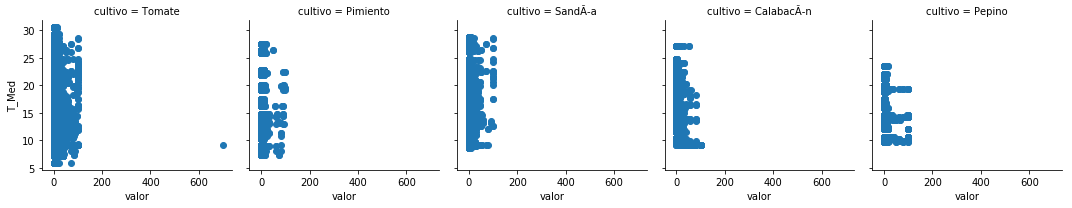

In [45]:
g1 = sns.FacetGrid(base, col='cultivo', margin_titles = True)
out = g1.map(plt.scatter, 'valor' ,'T_Med' )

De este modo, otra variable independiente clave dentro de nuestro modelo es la humedad relativa. Realizamos un gráfico similar al anterior, sustituyendo la variable T_MED por la H_R_Med. Los resultados obtenidos son muy similares, lo que nos invita a decir que existe una relación gráfica entre la temperatura y la humedad. Intentamos confirmar esta hipótesis en el siguiente gráfico, midiendo el porcentaje de plaga en relación a la temperatura y humedad relativa.

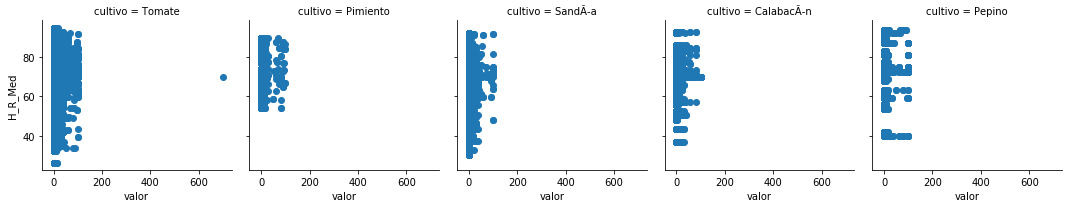

In [46]:
g1 = sns.FacetGrid(base, col='cultivo', margin_titles = True)
out = g1.map(plt.scatter, 'valor' ,'H_R_Med' )

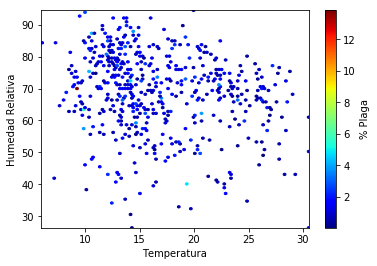

In [47]:
from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
import numpy as NP

x = base.T_Med
y = base.H_R_Med 
z = base.valor
PLT.hexbin(x, y, C=z, cmap=CM.jet, bins=None)
PLT.axis([x.min(), x.max(), y.min(), y.max()])

cb = PLT.colorbar()
cb.set_label('% Plaga')
PLT.xlabel('Temperatura')
PLT.ylabel('Humedad Relativa')
PLT.show()  

Los datos que disponemos del 2018 se recogen en los municipios de Nijar y Motril.
Realizamos un gráfico para visualizar el número de valores de plagas recogidos en ambos.
Siendo Nijar el municipio más afectado por las plagas.

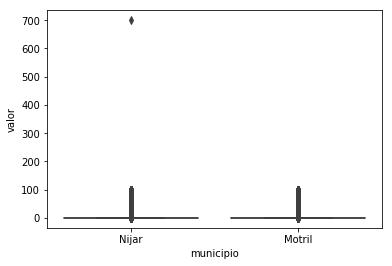

In [48]:
sns.boxplot(x= 'municipio', y='valor', data=base)

Otra variable analizada es la lluvia. El gráfico anterior parece indicar que a mayor lluvia, existe una mayor estabilidad en la variable dependiente (valor).

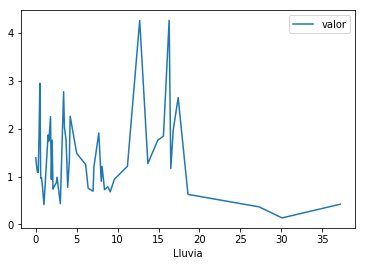

In [49]:
base.groupby('Lluvia').mean().loc[:,['valor']].plot()